In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# a function so we can show images later easily
def show_image(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.show()

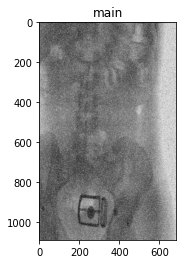

In [7]:
img = cv.imread('Noisy_Spine.png',0)
show_image(img, "main")

### A

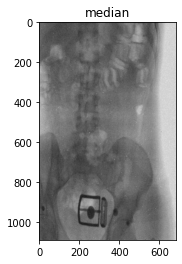

In [8]:
img_median = cv.medianBlur(img,3)
show_image(img_median, "median")

### B

In [ ]:
m, n = img.shape
img_new = np.zeros([m, n])
def masking(mask, img, img_new):
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            
            img_new[i, j]= temp
                
    return img_new.astype(np.uint8)
    
mask = np.ones([3, 3], dtype = int)
mask = mask / (3**2)
img_new = masking(mask, img, img_new)